In [81]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint



In [82]:
filepath = './model_stats.json'

with open(filepath, 'r') as file:
    model_stats = json.load(file)

In [83]:

def plot_lossv_from_model_logs(from_epoch=0):



    model_validations = {}

    for model in model_stats.keys():
        model_validations[model] = model_stats[model]['loss_vector']

    plt.figure(figsize=(12, 10))

    pprint(len(model_stats.keys()))
    for model in model_validations.keys():
        lossv = model_validations[model][from_epoch:]
        plt.plot(np.arange(1, len(lossv) + 1), lossv, label=model)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('loss vs epoch')


131


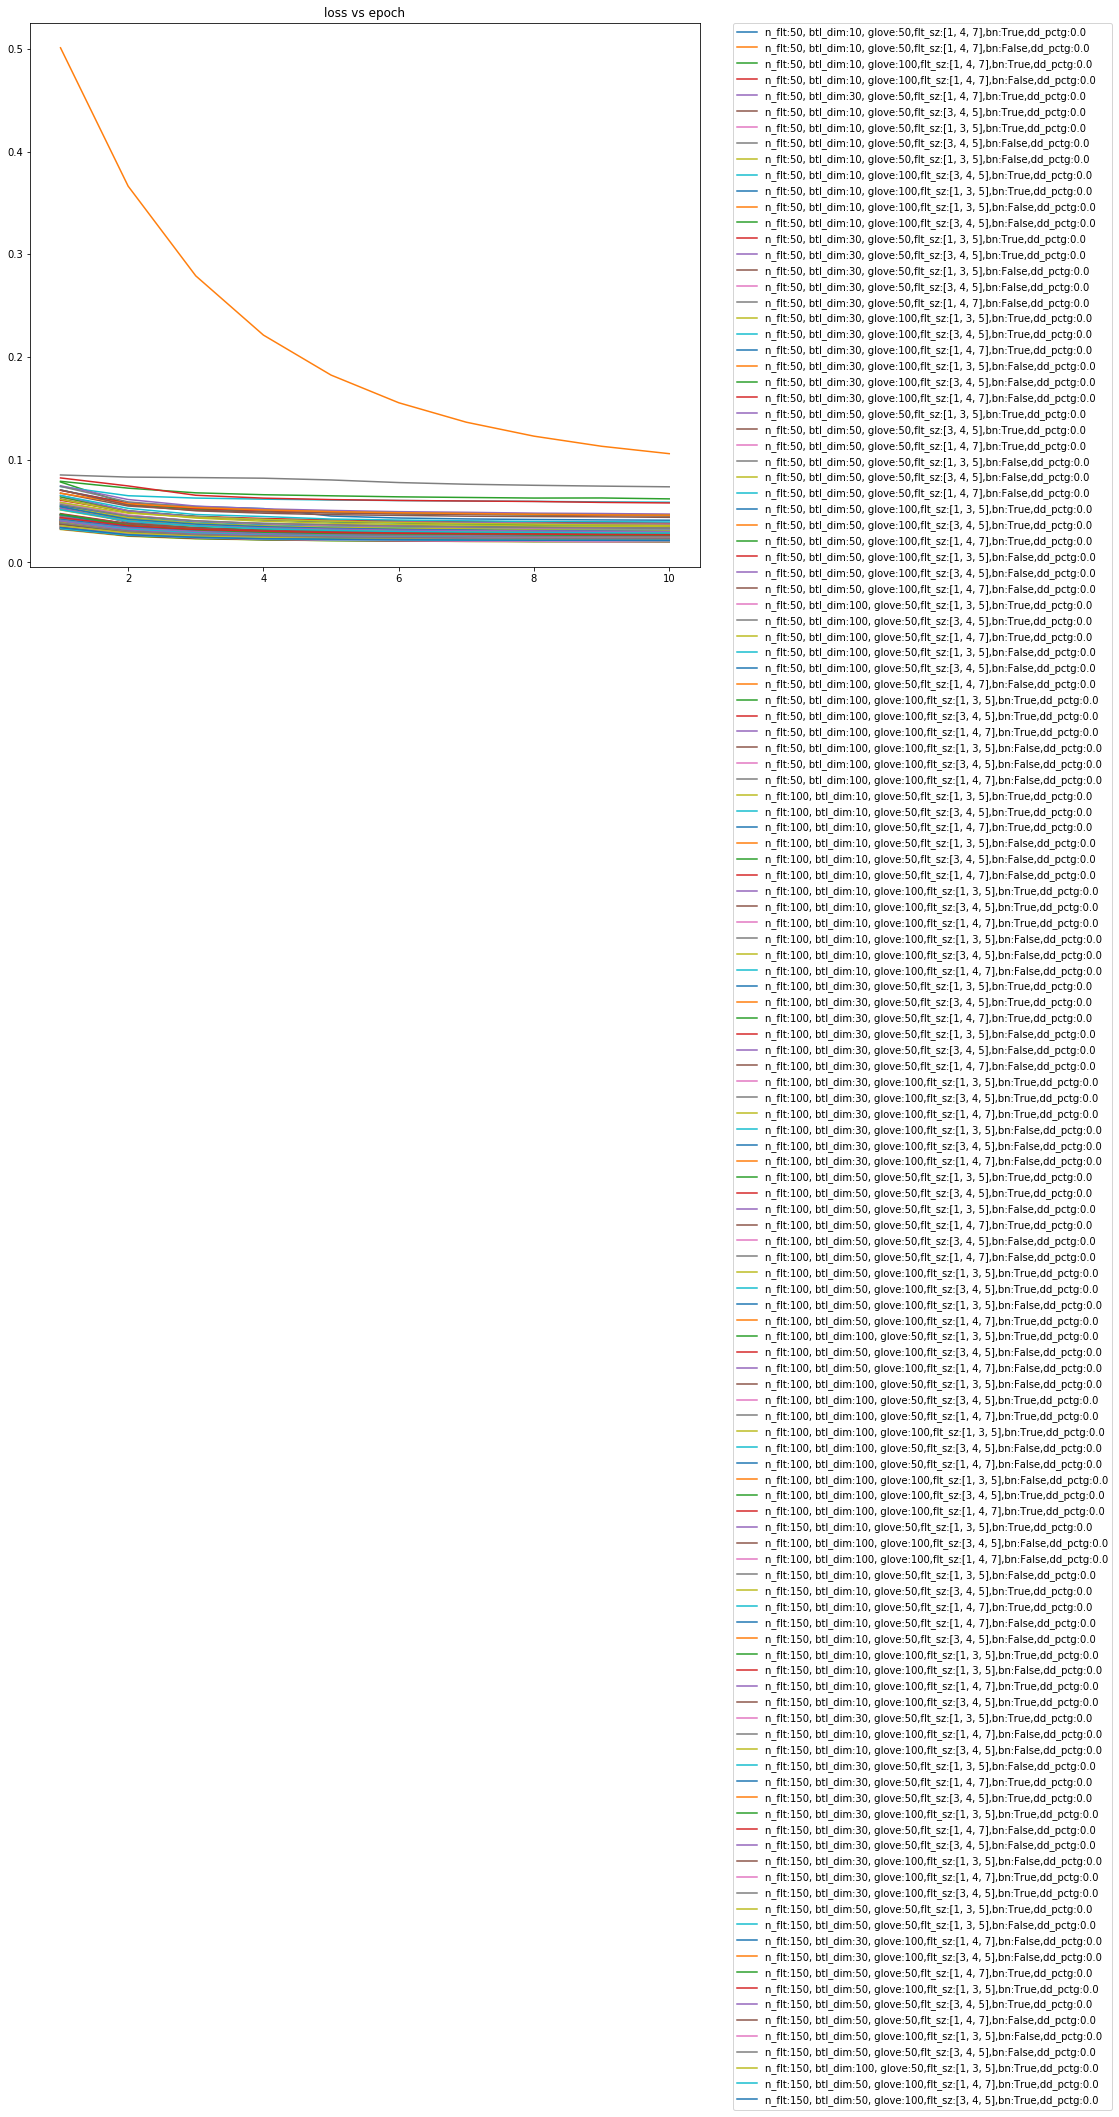

In [84]:
plot_lossv_from_model_logs()

131


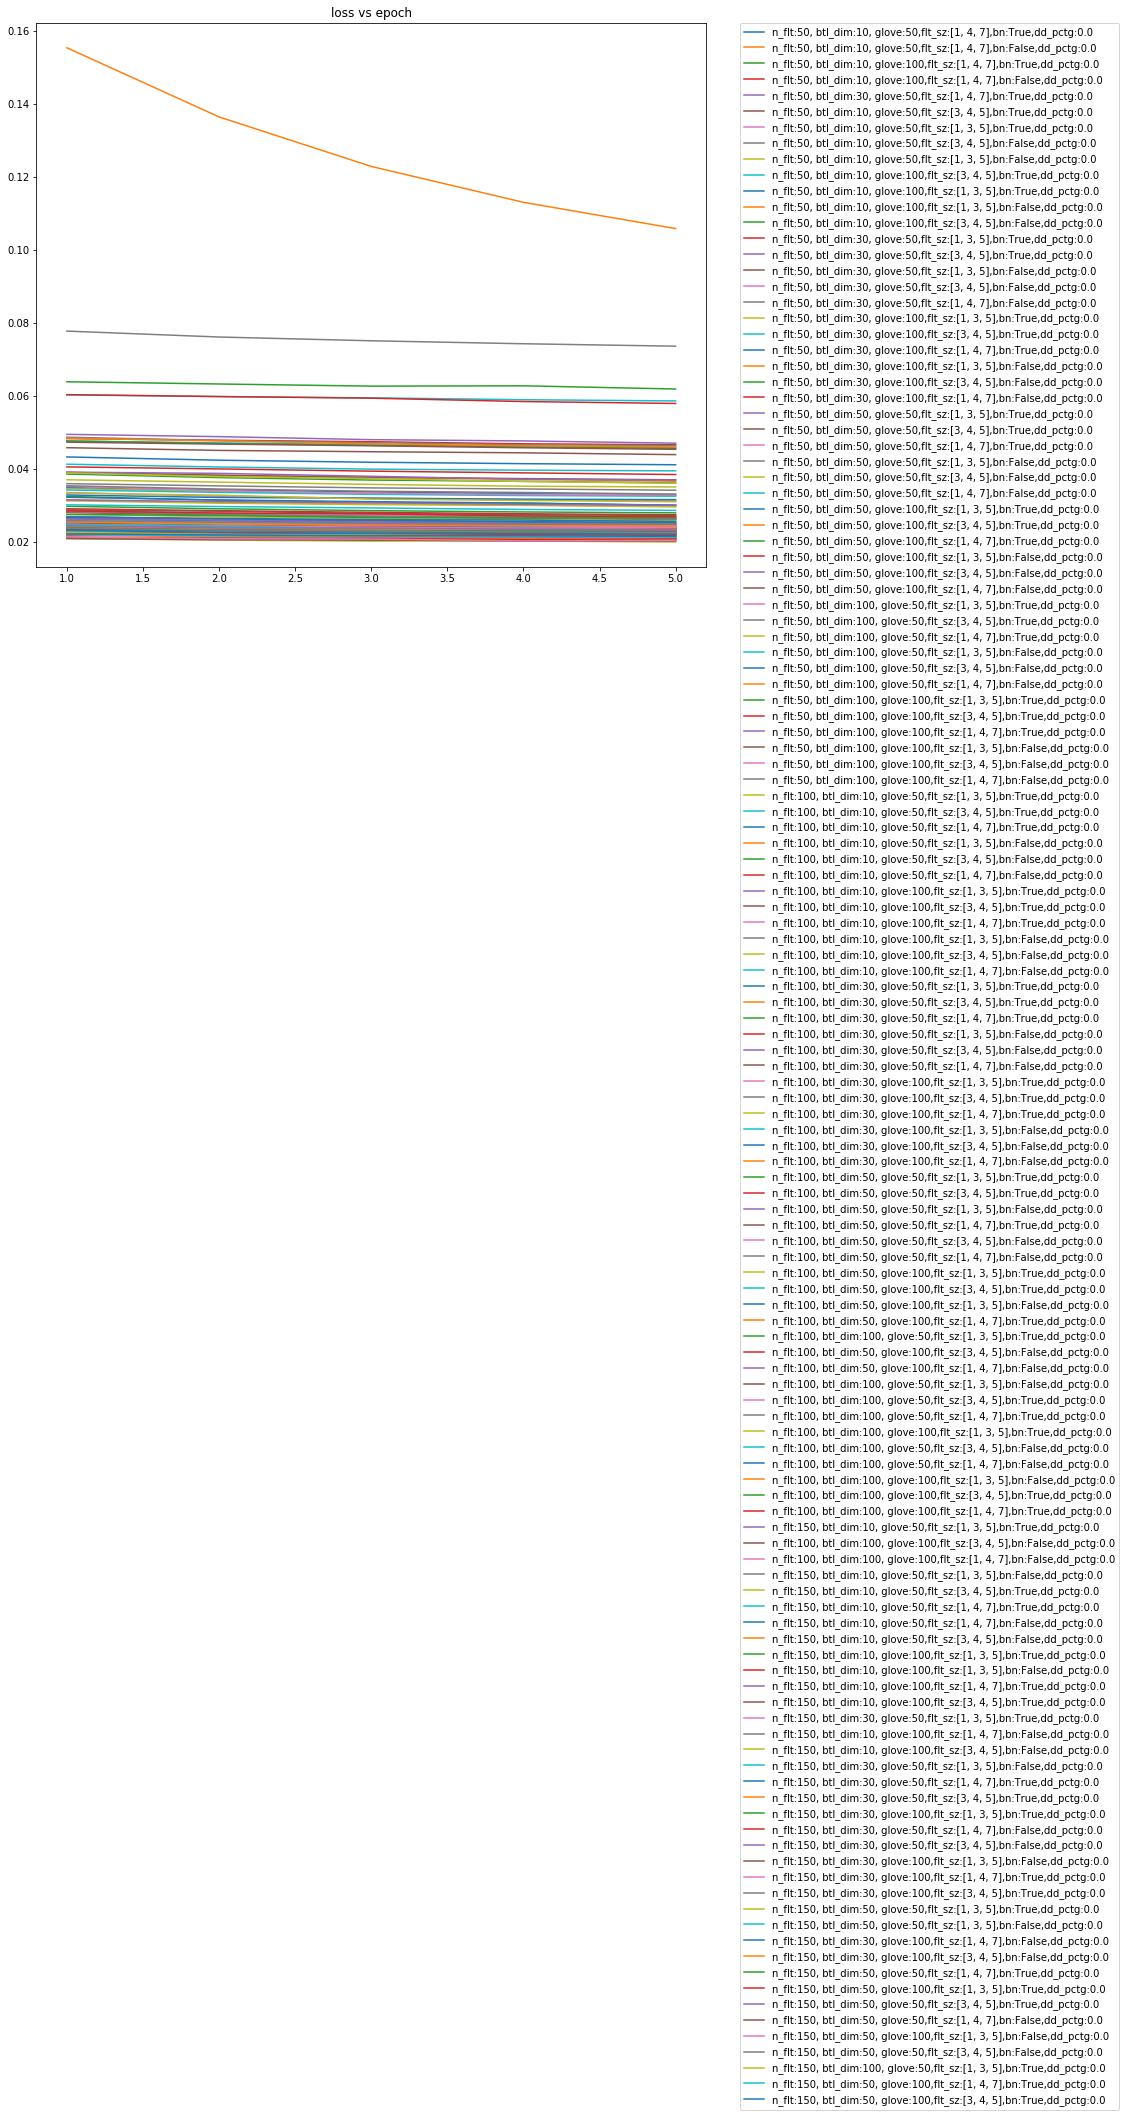

In [85]:
plot_lossv_from_model_logs(from_epoch =5 )

In [90]:
max_f1_score = 0
best_model = None

for model in model_stats.keys():
    f1 = model_stats[model]['f1_scores']['f1_score_3']
    if f1> max_f1_score:
        max_f1_score = f1
        best_model = model_stats[model]
        
    
    
pprint(best_model)

{'batch_norm': True,
 'batch_size': 512,
 'bottleneck_fc_dim': 100,
 'dropout_pctg': 0.0,
 'epochs': 10,
 'f1_scores': {'f1_score_2': 0.706430257620856,
               'f1_score_3': 0.8000430419928443,
               'f1_score_4': 0.7544129502135821},
 'filter_sizes': [1, 3, 5],
 'glove_dim': 100,
 'loss_vector': [0.03207004711158195,
                 0.025491480636647194,
                 0.022962849366210274,
                 0.02199808227182445,
                 0.02113591293977984,
                 0.02083302980636136,
                 0.020402017775607312,
                 0.02014088032419904,
                 0.020162105386666324,
                 0.01990155462112467],
 'max_txt_len': 500,
 'model': 'Model(\n'
          '  (embedding): Embedding(400000, 100)\n'
          '  (conv1): Conv2d(1, 100, kernel_size=(1, 100), stride=(1, 1))\n'
          '  (bn1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, '
          'track_running_stats=True)\n'
          '  (conv2): Conv2d